# Sample release for GWTC-1

This notebook serves as a basic introduction to loading and viewing data released in associaton with the publication titled __Observations of Compact Binary Mergers by Advanced LIGO and Advanced Virgo during the First and Second Observing Runs__ avaliable through [DCC](https://dcc.ligo.org/LIGO-P1800307/public) and [arXiv](https://arxiv.org/).

 The data used in these tutorials will be downloaded from the public DCC page [LIGO-P1800370](https://dcc.ligo.org/LIGO-P1800370/public).

For this notebook we'll use `h5py` to read the data files, `numpy` and `pandas` for general data manipulation as well as `matplotlib` and`seaborn` for plotting.

In [1]:
%matplotlib inline
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

There are 10 Binary Black Hole observations contained in this data release

In [3]:
BBHs = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729',  'GW170809', 'GW170814', 'GW170818', 'GW170823']

To illustrate the data structure we'll pick one BBH by random and plot its respective data.

In [4]:
a_BBH =  np.random.choice(BBHs)

print('We will use ', a_BBH, 'as an example of a BBH')

BBH_file = './'+a_BBH+'_GWTC-1.hdf5'

BBH = h5py.File(BBH_file, 'r')

print('This file contains four datasets: ', BBH.keys())

We will use  GW170104 as an example of a BBH
This file contains four datasets:  <KeysViewHDF5 ['IMRPhenomPv2_posterior', 'Overall_posterior', 'SEOBNRv3_posterior', 'prior']>


In [36]:
[i for i in BBH.keys()]

['IMRPhenomPv2_posterior', 'Overall_posterior', 'SEOBNRv3_posterior', 'prior']

This data file contains several datasets, two using separate models for the gravitaional waveform (`IMRPhenomPv2` and `SEOBNRv3` respectively, see the [paper](https://dcc.ligo.org/LIGO-P1800307) for more details). 

It also contiains a joint dataset, combining equal numbers of samples from each individual model, these datasets are what is shown in the [paper](https://dcc.ligo.org/LIGO-P1800307). 

Finally, there is a dataset containing samples drawn from the prior used for the analyses.

In [15]:
df = pd.read_hdf(BBH_file, mode='r')

ValueError: No dataset in HDF5 file.

In [19]:
BBH.keys()

<KeysViewHDF5 ['IMRPhenomPv2_posterior', 'Overall_posterior', 'SEOBNRv3_posterior', 'prior']>

In [25]:
SEOBNRv3_posterior = BBH['SEOBNRv3_posterior']
SEOBNRv3_posterior.dtype

dtype([('costheta_jn', '<f8'), ('luminosity_distance_Mpc', '<f8'), ('right_ascension', '<f8'), ('declination', '<f8'), ('m1_detector_frame_Msun', '<f8'), ('m2_detector_frame_Msun', '<f8'), ('spin1', '<f8'), ('spin2', '<f8'), ('costilt1', '<f8'), ('costilt2', '<f8')])

In [27]:
BBH['prior']['luminosity_distance_Mpc'].size

60297

Here are some brief descriptions of these parameters and their uses:

 * `luminosity_distance_Mpc`: luminosity distance [Mpc]

 * `m1_detector_frame_Msun`: primary (larger) black hole mass (detector frame) [solar mass]

 * `m2_detector_frame_Msun`: secondary (smaller) black hole mass (detector frame) [solar mass]

 * `right_ascension`, `declination`: right ascension and declination of the source [rad].

 * `costheta_jn`: cosine of the angle between line of sight and total angular momentum vector of system.

 * `spin1`, `costilt1`: primary (larger) black hole spin magnitude (dimensionless) and cosine of the zenith angle between the spin and the orbital angular momentum vector of system.

 * `spin2`, `costilt2`: secondary (smaller) black hole spin magnitude (dimensionless) and cosine of the zenith angle between the spin and the orbital angular momentum vector of system.
   


As an example, we'll show the four different dsitributions for the `luminosity distance` parameter.

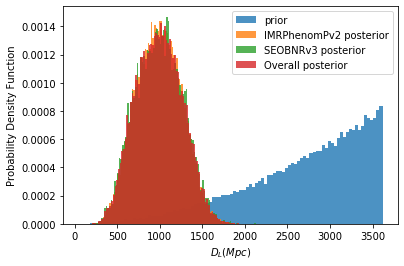

In [6]:
plt.hist(BBH['prior']['luminosity_distance_Mpc'], bins = 100, label='prior', alpha=0.8, density=True)
plt.hist(BBH['IMRPhenomPv2_posterior']['luminosity_distance_Mpc'], bins = 100, label='IMRPhenomPv2 posterior', alpha=0.8, density=True)
plt.hist(BBH['SEOBNRv3_posterior']['luminosity_distance_Mpc'], bins = 100, label='SEOBNRv3 posterior', alpha=0.8, density=True)
plt.hist(BBH['Overall_posterior']['luminosity_distance_Mpc'], bins = 100, label='Overall posterior', alpha=0.8, density=True)
plt.xlabel(r'$D_L (Mpc)$')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

We can also show the entirety of a single sample set, to showcase the correlation between different parameters.

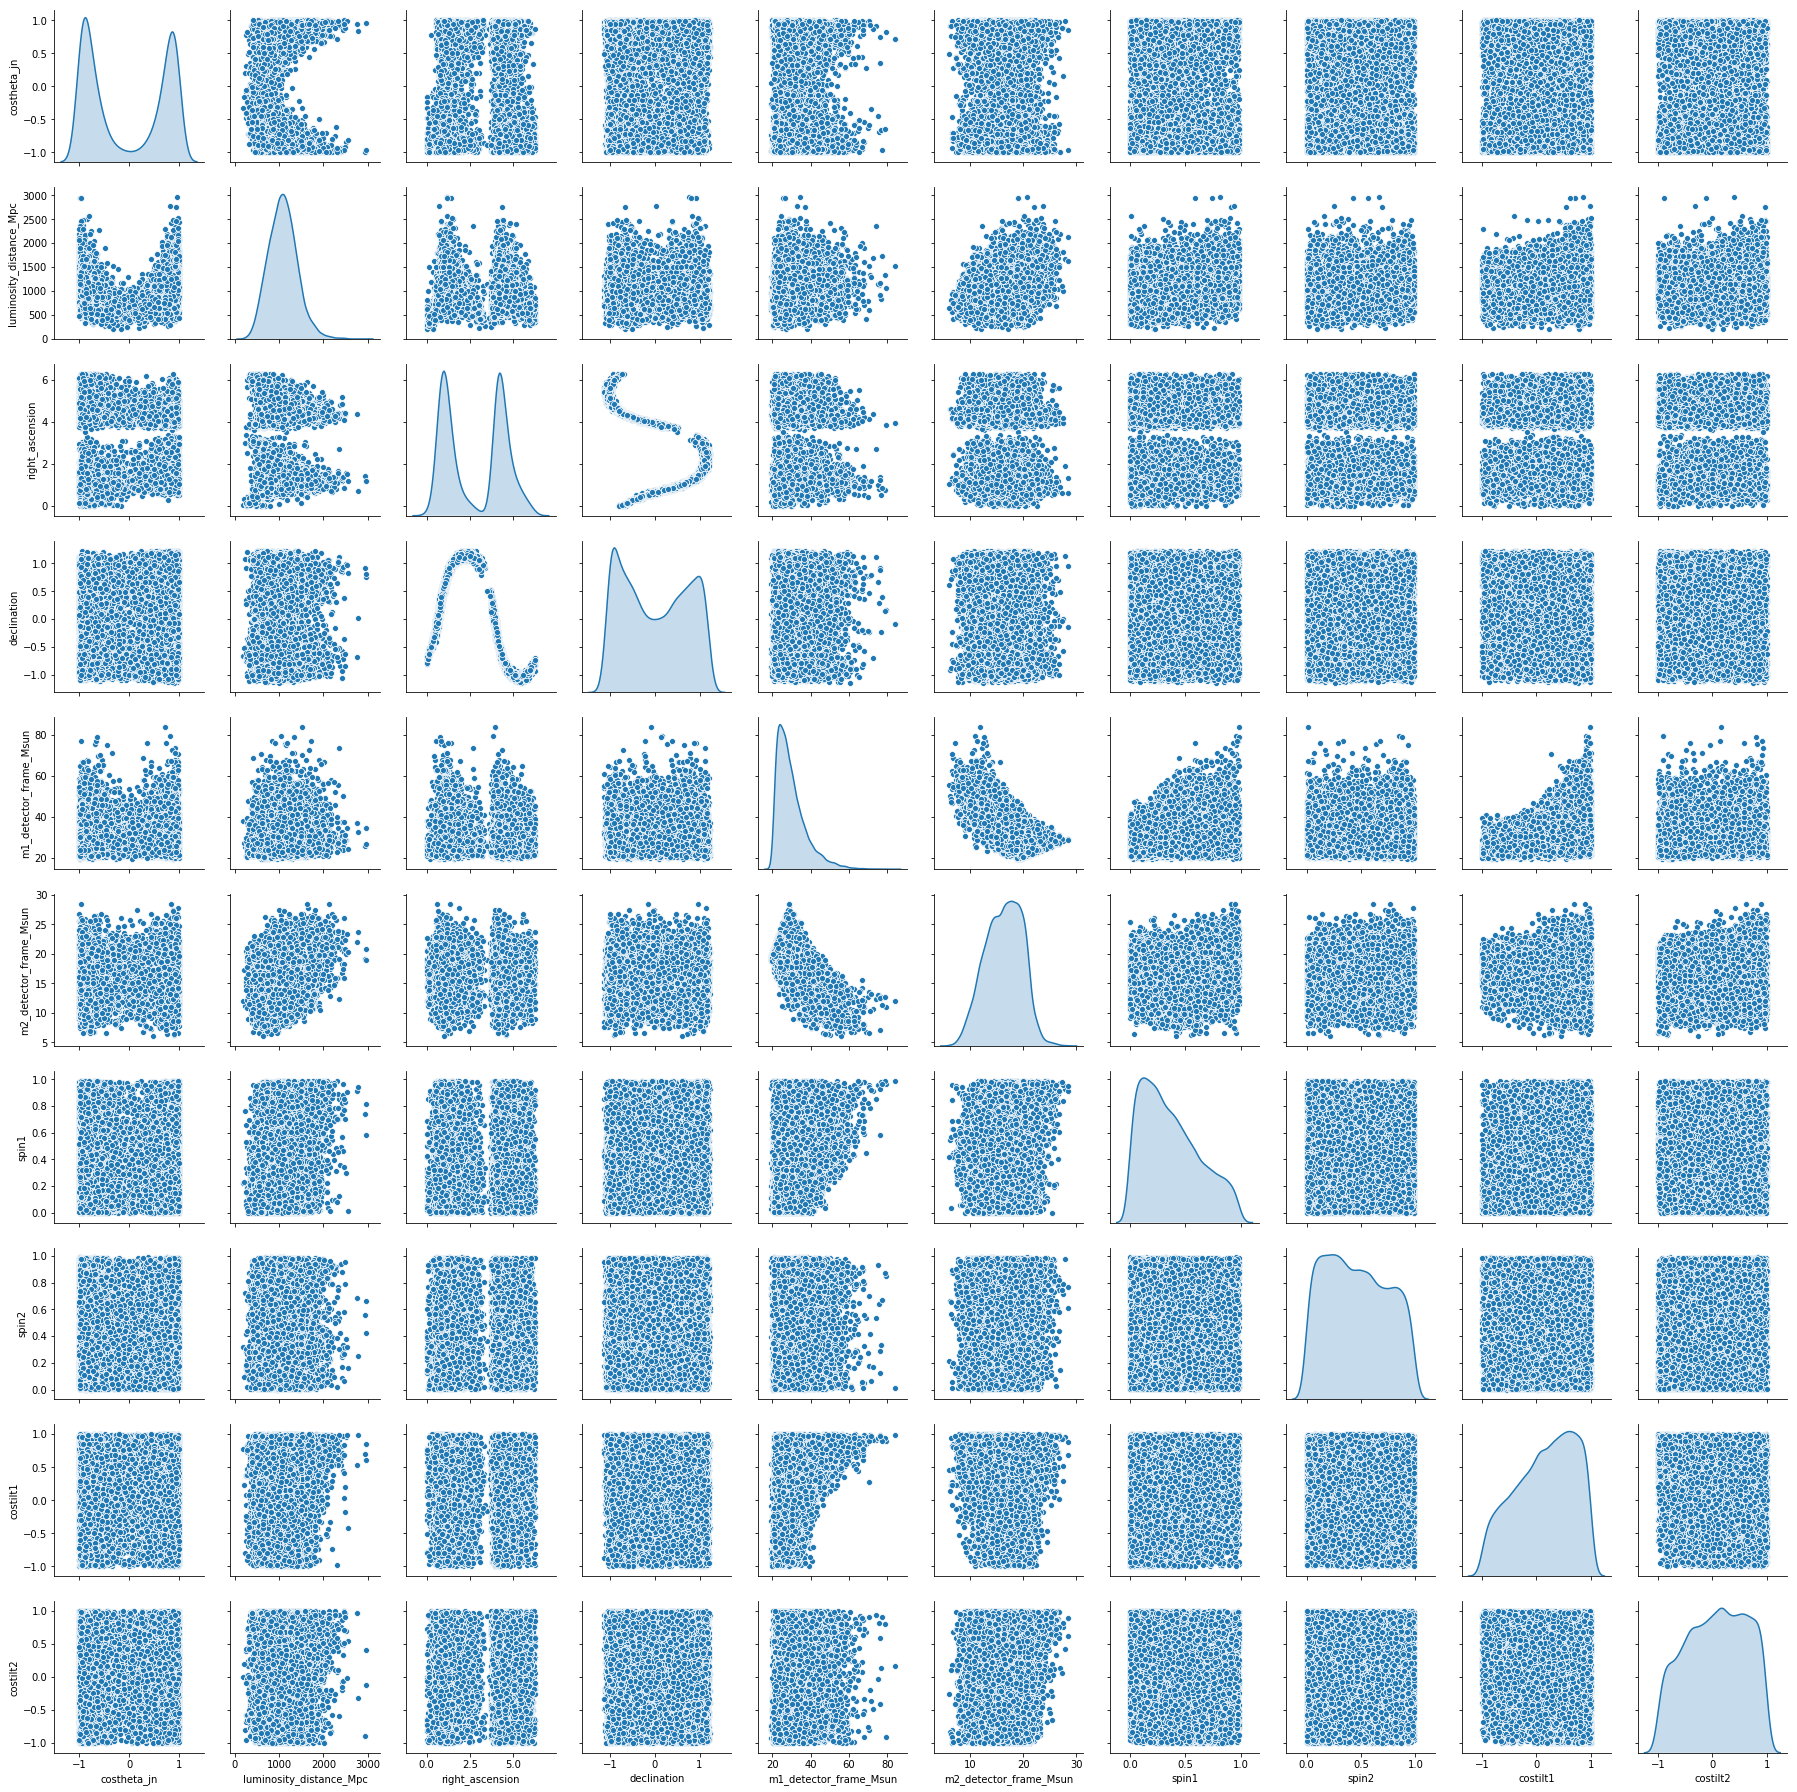

In [6]:
sns.pairplot(pd.DataFrame.from_records(np.array(BBH['/Overall_posterior'])), diag_kind="kde")
plt.show()

For the Binary Neutron Star GW170817, the sample release contains analyses using only one gravitaional waveform model `IMRPhenomPv2_NRTidal`, but with two separate prior bounds on the allowed spins of the two neutron stars (`highSpin: spins<0.89` and `lowSpin: spins<0.05`)

In [7]:
BNS_file = './GW170817_GWTC-1.hdf5'

BNS = h5py.File(BNS_file, 'r')

The BNS analysis includes the same parameters as the BBH sample release, with the addition of `lambda1` and `lambda2`, the dimensionless tidal deformability parameters for the more massive and less massive objects respectively.

In [8]:
highSpin = pd.DataFrame.from_records(np.array(BNS['/IMRPhenomPv2NRT_highSpin_posterior']))
highSpin['prior'] = 'High spins'
lowSpin = pd.DataFrame.from_records(np.array(BNS['/IMRPhenomPv2NRT_lowSpin_posterior']))
lowSpin['prior'] = 'Low spins'
BNS_data = pd.concat([highSpin, lowSpin])

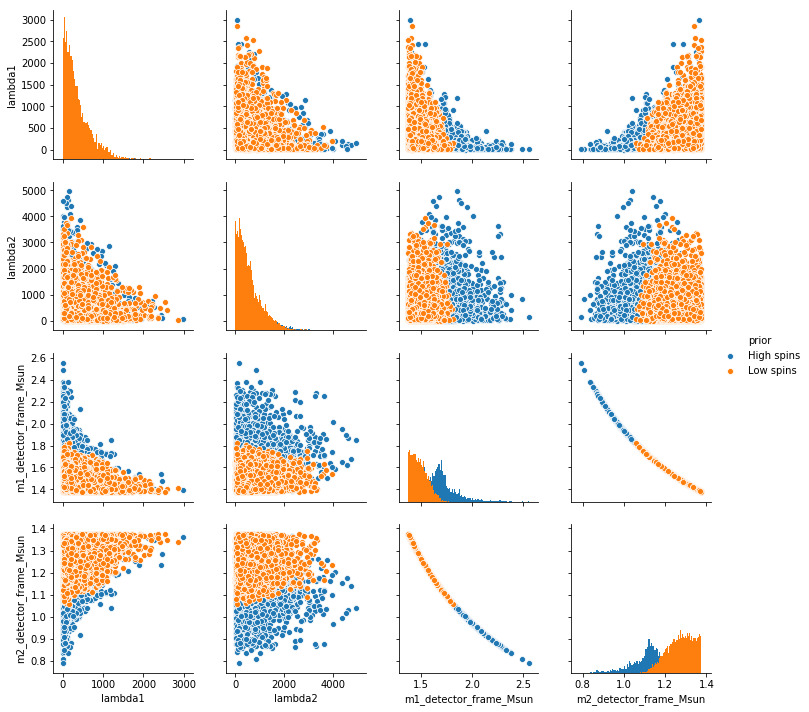

In [9]:
sns.pairplot(BNS_data,vars=["lambda1", "lambda2", "m1_detector_frame_Msun", "m2_detector_frame_Msun",], 
             hue='prior', diag_kind='hist', diag_kws={"bins": 100})
plt.show()

Finally, there is a sample release for the analysis where the BBH GW170809 is re-analysed under three different prior assumptions (details given in `Appendix C` of the [paper](https://dcc.ligo.org/LIGO-P1800307))

This file, `GW170809_priorChoices_GWTC-1.hdf5`, contains both samples from the respective prior and posterior distributions (all analyses performed using the `IMRPhenomPv2` waveform model).
Each dataset contains the same parameters as the main BBH analyses.